In [1]:
import yfinance as yf

# Lista de ativos
ativos = {
    'Energia e Petróleo': ['PETR4.SA', 'ENEV3.SA', 'UGPA3.SA'],
    'Mineração': ['VALE3.SA', 'CMIN3.SA'],
    'Bancário': ['ITUB4.SA', 'BBAS3.SA', 'BBDC4.SA'],
    'Varejo': ['MGLU3.SA', 'VIIA3.SA'],
    'Alimentação': ['JBSS3.SA', 'BRFS3.SA','ABEV3.SA'],
    'Commodities': ['GC=F', 'BZ=F', 'ZC=F', 'C=F', 'HRC=F'],
    'IndiceBVSP': ['^BVSP']
}

# Configuração do período de tempo (5 anos)
start_date = '2018-07-09'
end_date = '2023-07-09'

# Dicionário para armazenar os dados
dados = {}

# Busca e armazenamento dos dados
for setor, tickers in ativos.items():
    dados[setor] = {}
    for ticker in tickers:
        acao = yf.download(ticker, start=start_date, end=end_date)
        dados[setor][ticker] = acao

# Busca dos dados do Indice Bovespa (BVSP)
ipca = yf.download('^BVSP', start=start_date, end=end_date)

# Exemplo de acesso aos dados
print(dados['Energia e Petróleo']['PETR4.SA'].head())
print(ipca.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [2]:
import pandas as pd

# Carregando os dados do IPCA
ipca = pd.read_csv("IPCA_SER.csv", sep=";")  # informar o separador correto

# Transformando ANO e MES em datetime
ipca['Data'] = pd.to_datetime(ipca['ANO'].astype(str) + "-" + ipca['MES'].astype(str) + "-01")

# Substituindo vírgulas por pontos e convertendo para float
ipca['VALOR'] = ipca['VALOR'].str.replace(',', '.').astype(float)

# Definindo Data como index
ipca = ipca.set_index('Data')

# Acumulando o IPCA
ipca['Acumulado'] = (ipca['VALOR'] / 100 + 1).cumprod()

# Corrigindo os dados pelo IPCA
for setor, tickers in dados.items():
    for ticker in tickers:
        # Ajustando o DataFrame para ter a mesma index que o IPCA
        acao = dados[setor][ticker].reindex(ipca.index, method='ffill')
        
        # Corrigindo o preço de fechamento pela inflação e criando uma nova coluna 'ipc_adjusted'
        acao['ipc_adjusted'] = acao['Adj Close'] * ipca['Acumulado']
        
        # Salvando os dados corrigidos
        dados[setor][ticker] = acao


In [3]:
acao

,Open,High,Low,Close,Adj Close,Volume,ipc_adjusted
Data,,,,,,,
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,79213.0,79731.0,78769.0,79302.0,79302.0,3227100.0,79492.089273
2018-09-01,76386.0,77202.0,76026.0,76678.0,76678.0,4145600.0,77230.736104
2018-10-01,79350.0,79557.0,78091.0,78624.0,78624.0,3134400.0,79547.122352
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0,89269.265231
...,...,...,...,...,...,...,...
2023-03-01,104933.0,105497.0,103105.0,104385.0,104385.0,19853000.0,136773.339432
2023-04-01,103714.0,104041.0,101476.0,101882.0,101882.0,15111200.0,134308.025965
2023-05-01,102923.0,104432.0,102449.0,104432.0,104432.0,13080900.0,137986.255628


In [4]:
petrobras = dados['Energia e Petróleo']['PETR4.SA']


In [5]:
petrobras

,Open,High,Low,Close,Adj Close,Volume,ipc_adjusted
Data,,,,,,,
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,19.590000,20.010000,19.540001,20.010000,7.380204,39141700.0,7.397895
2018-09-01,18.950001,19.430000,18.910000,19.260000,7.121351,75767400.0,7.172685
2018-10-01,21.250000,21.360001,20.799999,21.000000,7.764714,56540400.0,7.855879
2018-11-01,27.760000,28.020000,27.110001,27.320000,10.101522,98037100.0,10.198662
...,...,...,...,...,...,...,...
2023-03-01,25.309999,25.430000,24.190001,25.299999,21.133570,109257700.0,27.690845
2023-04-01,24.000000,24.219999,23.209999,23.450001,19.588232,59547800.0,25.822587
2023-05-01,23.600000,24.049999,23.150000,23.700001,22.243404,81138500.0,29.390264


In [6]:
# Selecionando os dados da Petrobras
petrobras = dados['Energia e Petróleo']['PETR4.SA']

# Filtrando para o ano de 2018
petrobras_2018 = petrobras[petrobras.index.year == 2018]

# Exibindo os dados
print(petrobras_2018)


                 Open       High        Low      Close  Adj Close      Volume  \
Data                                                                            
2018-07-01        NaN        NaN        NaN        NaN        NaN         NaN   
2018-08-01  19.590000  20.010000  19.540001  20.010000   7.380204  39141700.0   
2018-09-01  18.950001  19.430000  18.910000  19.260000   7.121351  75767400.0   
2018-10-01  21.250000  21.360001  20.799999  21.000000   7.764714  56540400.0   
2018-11-01  27.760000  28.020000  27.110001  27.320000  10.101522  98037100.0   
2018-12-01  25.110001  25.559999  25.070000  25.459999   9.451341  90874500.0   

            ipc_adjusted  
Data                      
2018-07-01           NaN  
2018-08-01      7.397895  
2018-09-01      7.172685  
2018-10-01      7.855879  
2018-11-01     10.198662  
2018-12-01      9.556541  


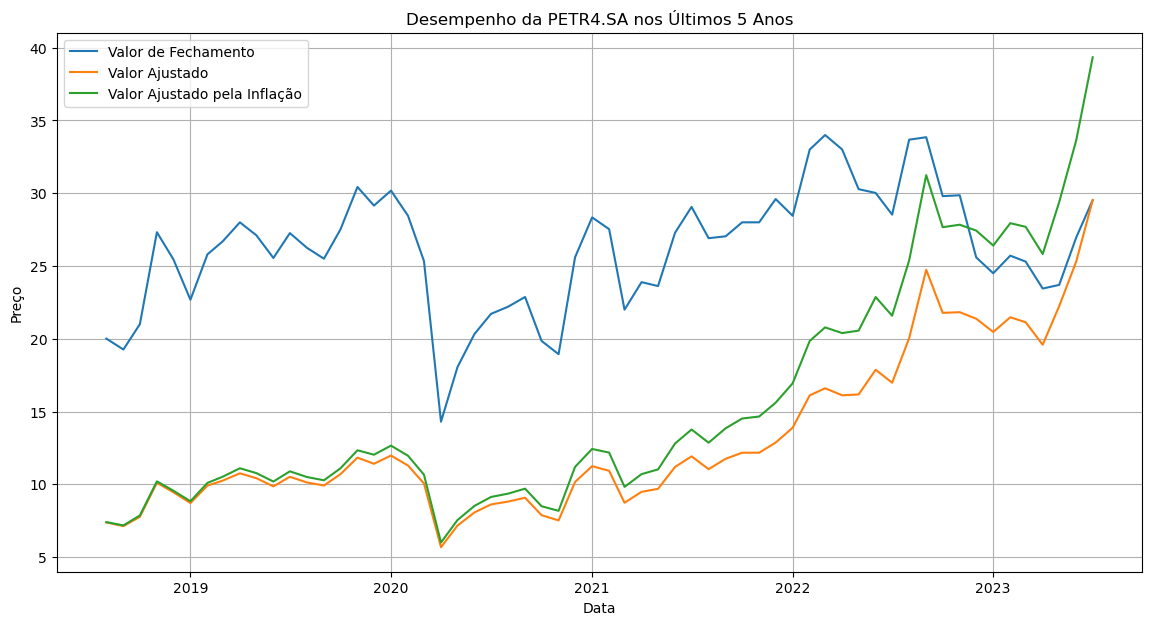

In [7]:
import matplotlib.pyplot as plt

# Selecionando os dados da Petrobras nos últimos 5 anos
petrobras = dados['Energia e Petróleo']['PETR4.SA']
petrobras = petrobras.loc[start_date:end_date]

# Criando o gráfico
plt.figure(figsize=(14, 7))
plt.plot(petrobras.index, petrobras['Close'], label='Valor de Fechamento')
plt.plot(petrobras.index, petrobras['Adj Close'], label='Valor Ajustado')
plt.plot(petrobras.index, petrobras['ipc_adjusted'], label='Valor Ajustado pela Inflação')

# Configurando o título e os rótulos dos eixos
plt.title('Desempenho da PETR4.SA nos Últimos 5 Anos')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()  # Mostrar a legenda
plt.grid(True)
plt.show()


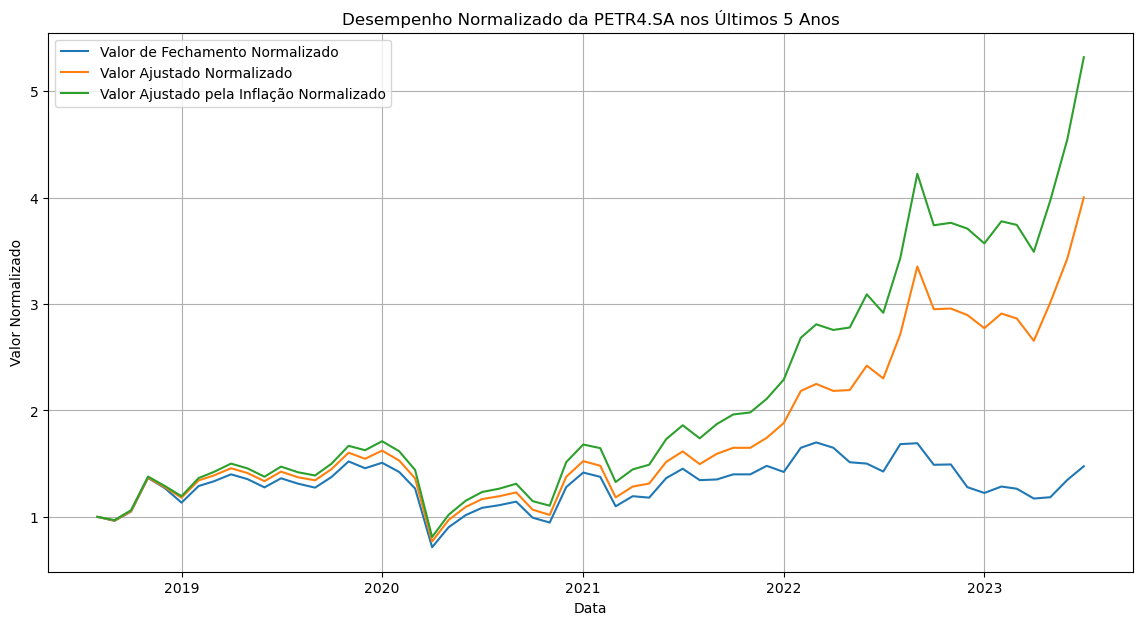

In [10]:
import matplotlib.pyplot as plt

# Selecionando os dados da Petrobras nos últimos 5 anos
petrobras = dados['Energia e Petróleo']['PETR4.SA'].copy()
petrobras = petrobras.loc[start_date:end_date]

# Normalizando os dados para que comecem a partir de 1
petrobras['Close_norm'] = petrobras['Close'] / petrobras['Close'].iloc[0]
petrobras['Adj Close_norm'] = petrobras['Adj Close'] / petrobras['Adj Close'].iloc[0]
petrobras['ipc_adjusted_norm'] = petrobras['ipc_adjusted'] / petrobras['ipc_adjusted'].iloc[0]

# Criando o gráfico
plt.figure(figsize=(14, 7))
plt.plot(petrobras.index, petrobras['Close_norm'], label='Valor de Fechamento Normalizado')
plt.plot(petrobras.index, petrobras['Adj Close_norm'], label='Valor Ajustado Normalizado')
plt.plot(petrobras.index, petrobras['ipc_adjusted_norm'], label='Valor Ajustado pela Inflação Normalizado')

# Configurando o título e os rótulos dos eixos
plt.title('Desempenho Normalizado da PETR4.SA nos Últimos 5 Anos')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.legend()  # Mostrar a legenda
plt.grid(True)
plt.show()
